# Altair：Pythonの統計的視覚化 

[Altair]（http://github.com/altair-viz/altair/）は、[Vega-Lite]（http://vega.github.io/vega-の上に構築された、統計的視覚化のための宣言型PythonAPIを提供します。 lite /）。

ここにリストされているノートブックは、一連のチュートリアルとAltairの使用例を提供します。 より完全なドキュメントについては、[Altairのドキュメント]（http://altair-viz.github.io/）を参照してください。

これらのノートブックは、Altairバージョン2.0以降を想定していることに注意してください。 

In [ ]:
import altair
altair.__version__

'4.1.0'

## Altairについて

Altairは[Vega-Lite]（http://vega.github.io/vega-lite/）上に構築されています。 Vega-liteのドキュメントから：

> Vega-Lite仕様では、視覚化をデータからグラフィックマーク（ポイントやバーなど）のプロパティへのマッピングとして説明しています。軸、凡例、スケールなどの視覚化コンポーネントを自動的に生成します。次に、慎重に設計された一連のルールに基づいて、これらのコンポーネントのプロパティを決定します。このアプローチにより、Vega-Liteの仕様を簡潔で表現力豊かにするだけでなく、ユーザーによる制御も可能になります。 Vega-Liteは分析用に設計されているため、集計、ビニング、フィルタリング、並べ替えなどのデータ変換、およびスタッキングやファセットを含む視覚的な変換をサポートします。

この宣言型アプローチの重要な特徴は、ユーザーが視覚化の仕組みではなく、データについて自由に考えることができることです。 Vega-Liteの仕様は、JavaScript Object Notation（JSON）で表現されます。これは、ネストされたデータや階層データの保存によく使用されるクロスプラットフォーム形式です。 Altairはこの上にPythonレイヤーを構築するため、ユーザーは生のJSON文字列を作成する代わりに、宣言型のPythonコードを作成できます。 

## Altairの簡単な例 

AltairAPIの動作の簡単な例を次に示します。

In [ ]:
import altair as alt
from vega_datasets import data

cars = data.cars()

chart = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

chart

alt.Chart(...)

ほとんどの場合、「チャート」に渡されるデータは、ここに表示されているように、標準のパンダデータフレームになります。

In [ ]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


内部的には、Altairは入力を解釈し、vega-lite仕様のPython辞書を作成します（わかりやすくするためにデータを削除します）。

In [ ]:
dct = chart.to_dict()
dct.pop('datasets')  # leave out dataset for clarity
dct

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.8.1.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data-f02450ab61490a1363517a0190416235'},
 'encoding': {'color': {'field': 'Origin', 'type': 'nominal'},
  'x': {'field': 'Horsepower', 'type': 'quantitative'},
  'y': {'field': 'Miles_per_Gallon', 'type': 'quantitative'}},
 'mark': 'circle'}

JSONに変換すると、この仕様はVega-Liteで期待される形式になります。

## Matplotlibとの比較

Altairの宣言的な性質を明確にするために、[Matplotlib]（http://matplotlib.org/）で同じ視覚化を実行します。

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

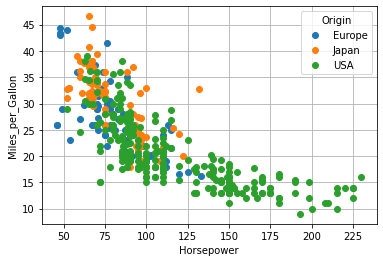

In [ ]:
for origin, group in cars.groupby('Origin'):
    plt.plot(group['Horsepower'], group['Miles_per_Gallon'],
             'o', label=origin)
plt.legend(title='Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon');
plt.grid(True)

matplotlibを使用すると、ユーザーはgroup-by操作を手動で実行し、軸と凡例にラベルを付ける必要があります。
対照的に、Altairの宣言型アプローチでは、ユーザーは*どのように*行うかではなく、*何*を行うかを指定するだけで済みます。

＃＃ ドキュメンテーション

Altairの詳細については、ドキュメントサイトをご覧ください。

-[Altairドキュメント]（http://altair-viz.github.io）

さらに、Altairを使用して、その基礎となるVega-Liteライブラリを理解する場合に役立ちます。 Vega-Liteのドキュメントはここにあります：

-[Vega-Liteドキュメント]（https://vega.github.io/vega-lite/docs/）

##ノートブックのインデックス

このリポジトリには、チュートリアルとAltairの使用例を提供する多数のノートブックが含まれています。

-[チュートリアル]（02-Tutorial.ipynb）
-[散布図]（03-ScatterCharts.ipynb）
-[棒グラフ]（04-BarCharts.ipynb）
-[折れ線グラフ]（05-LineCharts.ipynb）
-[面グラフ]（06-AreaCharts.ipynb）
-[レイヤードチャート]（07-LayeredCharts.ipynb）
-[車のデータセット]（08-CarsDataset.ipynb）
-[例：はしかデータ]（09-Measles.ipynb）

Githubまたはnbviewerでこれらのノートブックを閲覧している場合は、次のバッジをクリックすると、これらのノートブックのライブバージョンを利用できます。

[！[バインダー]（https://mybinder.org/badge_logo.svg）]（https://mybinder.org/v2/gh/altair-viz/altair_notebooks/master?urlpath=lab/tree/notebooks/Index.ipynb）

さらに、[Altairのサンプルギャラリー]（https://altair-viz.github.io/gallery/）でいくつかのAltairサンプルプロットを見ることができます。